# Load Prediction Using LSTM (RNN)

## Exracting specific colums from rawdata

In [1]:
import pandas as pd

df = pd.read_csv("rawdata.csv"  ,usecols = ['utc_timestamp','AT_load_actual_entsoe_transparency','AT_price_day_ahead'])
df1 = pd.read_csv("rawdata.csv"  ,usecols = ['utc_timestamp','AT_load_actual_entsoe_transparency'])

print(df.head(5))

df = df.dropna()

df.to_csv("rawdatasimple.csv", index = False)
df1.to_csv("rawdatasimple1.csv", index = False)

          utc_timestamp  AT_load_actual_entsoe_transparency  \
0  2014-12-31T23:00:00Z                                 NaN   
1  2015-01-01T00:00:00Z                              5946.0   
2  2015-01-01T01:00:00Z                              5726.0   
3  2015-01-01T02:00:00Z                              5347.0   
4  2015-01-01T03:00:00Z                              5249.0   

   AT_price_day_ahead  
0                 NaN  
1                35.0  
2                45.0  
3                41.0  
4                38.0  


## Adding Week Names

In [2]:
asd = open("rawdatasimple.csv", "r").readlines()
bsd = open("outp2.csv", "w")


import datetime

for line in asd:

    try:
        date = line.split("T")[0]

        year, month, day = date.split('-')
        day_name = datetime.date(int(year), int(month), int(day))
        day_str = day_name.strftime("%A")

        if line.__contains__("T16") or line.__contains__("T17") or line.__contains__("T18") or line.__contains__("T19"):
            bsd.write(line.replace("\n", "") + "," + day_str + "\n")

        else:
            bsd.write(line.replace("\n", "") + "," + day_str + "\n")

    except:
        pass

## Adding new Coloumn to map Peek Hours

In [3]:
asd = open("outp2.csv", "r").readlines()
bsd = open("outp3.csv", "w")
bsd.write("Date,Total_ALoad,Price_day_ahead,days,hour_type\n")

for line in asd:

    if not (line.__contains__("Saturday") or line.__contains__("Sunday")):

        if line.__contains__("T16") or line.__contains__("T17") or line.__contains__("T18") or line.__contains__("T19") :
            bsd.write(line.replace("\n", "") + ",1\n")
        else:
            bsd.write(line.replace("\n", "") + ",0\n")

    else:
        bsd.write(line.replace("\n", "") + ",0\n")


## Removing Redundant Coloumn and saving final dataset

In [4]:
import pandas as pd

df = pd.read_csv("outp3.csv")
del df['days']

df.to_csv("final_data.csv",index=False)


In [5]:
df1 = pd.read_csv("rawdatasimple1.csv")
df1 = df1.dropna()
df1

,utc_timestamp,AT_load_actual_entsoe_transparency
1,2015-01-01T00:00:00Z,5946.0
2,2015-01-01T01:00:00Z,5726.0
3,2015-01-01T02:00:00Z,5347.0
4,2015-01-01T03:00:00Z,5249.0
5,2015-01-01T04:00:00Z,5309.0
...,...,...
50396,2020-09-30T19:00:00Z,6661.0
50397,2020-09-30T20:00:00Z,6336.0
50398,2020-09-30T21:00:00Z,5932.0
50399,2020-09-30T22:00:00Z,5628.0


## Converting TimeStamp into multiple coloums

In [6]:
dataset = df1
dataset["Month"] = pd.to_datetime(df1["utc_timestamp"]).dt.month
dataset["Year"] = pd.to_datetime(df1["utc_timestamp"]).dt.year
dataset["Date"] = pd.to_datetime(df1["utc_timestamp"]).dt.date
dataset["Time"] = pd.to_datetime(df1["utc_timestamp"]).dt.time
dataset["Week"] = pd.to_datetime(df1["utc_timestamp"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df1["utc_timestamp"]).dt.day_name()
dataset = df1.set_index("utc_timestamp")
dataset.index = pd.to_datetime(dataset.index)

dataset.head(5)

,AT_load_actual_entsoe_transparency,Month,Year,Date,Time,Week,Day
utc_timestamp,,,,,,,
2015-01-01 00:00:00+00:00,5946.0,1,2015,2015-01-01,00:00:00,1,Thursday
2015-01-01 01:00:00+00:00,5726.0,1,2015,2015-01-01,01:00:00,1,Thursday
2015-01-01 02:00:00+00:00,5347.0,1,2015,2015-01-01,02:00:00,1,Thursday
2015-01-01 03:00:00+00:00,5249.0,1,2015,2015-01-01,03:00:00,1,Thursday
2015-01-01 04:00:00+00:00,5309.0,1,2015,2015-01-01,04:00:00,1,Thursday


In [7]:
print(df1.Year.unique(),"\n")
print("Total Number of Unique Year", df1.Year.nunique(), "\n")

[2015 2016 2017 2018 2019 2020] 

Total Number of Unique Year 6 



Text(0.5, 1.0, 'Energy Consumption According to Year')

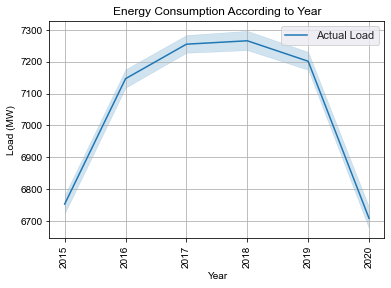

In [8]:
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AT_load_actual_entsoe_transparency"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Year")
plt.ylabel("Load (MW)")
plt.grid(True)
plt.legend(['Actual Load'])

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

In [9]:
TestData = dataset.tail(100)

Training_Set = dataset.iloc[:,0:1]

Training_Set = Training_Set[:-60]

print("Training Set Shape ", Training_Set.shape)

print("Test Set Shape ", TestData.shape)

Training Set Shape  (50340, 1)
Test Set Shape  (100, 7)


In [10]:

from sklearn.preprocessing import MinMaxScaler

#Normalization 
# Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [11]:
import numpy as np

X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(50280, 60, 1)
(50280, 1)


In [12]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(50280, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout, Dense


regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_Train, Y_Train, epochs = 10, batch_size=32)

Epoch 1/10
1572/1572 [==============================] - 149s 95ms/step - loss: 0.0100
Epoch 2/10
1572/1572 [==============================] - 152s 96ms/step - loss: 0.0036
Epoch 3/10
1572/1572 [==============================] - 153s 97ms/step - loss: 0.0022
Epoch 4/10
1572/1572 [==============================] - 151s 96ms/step - loss: 0.0014
Epoch 5/10
1572/1572 [==============================] - 151s 96ms/step - loss: 9.3350e-04
Epoch 6/10
1572/1572 [==============================] - 150s 96ms/step - loss: 7.3039e-04
Epoch 7/10
1572/1572 [==============================] - 150s 96ms/step - loss: 6.0934e-04
Epoch 8/10
1572/1572 [==============================] - 150s 96ms/step - loss: 5.8010e-04
Epoch 9/10
1572/1572 [==============================] - 151s 96ms/step - loss: 5.3856e-04
Epoch 10/10
1572/1572 [==============================] - 151s 96ms/step - loss: 5.1353e-04


In [15]:
loss = regressor.evaluate(X_Train, Y_Train, verbose=1)
loss

1572/1572 [==============================] - 47s 30ms/step - loss: 2.5411e-04


0.00025411005481146276

In [16]:
import math 
TM_RMSE = math.sqrt(loss)
TM_RMSE

0.015940829803101932

In [17]:
TestData.head(2)

,AT_load_actual_entsoe_transparency,Month,Year,Date,Time,Week,Day
utc_timestamp,,,,,,,
2020-09-26 20:00:00+00:00,5648.0,9,2020,2020-09-26,20:00:00,39,Saturday
2020-09-26 21:00:00+00:00,5245.0,9,2020,2020-09-26,21:00:00,39,Saturday


In [18]:
TestData.shape

(100, 7)

In [19]:
dataset.shape

(50400, 7)

In [20]:
Df_Total = pd.concat((dataset[["AT_load_actual_entsoe_transparency"]], TestData[["AT_load_actual_entsoe_transparency"]]), axis=0)

In [21]:
Df_Total.shape

(50500, 1)

In [22]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [23]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_load = regressor.predict(X_test, verbose=1)

# Do inverse Transformation to get Values 
predicted_load = sc.inverse_transform(predicted_load)

4/4 [==============================] - 0s 68ms/step


In [24]:
True_MegaWatt = TestData["AT_load_actual_entsoe_transparency"].to_list()
Predicted_MegaWatt  = predicted_load
dates = TestData.index.to_list()

In [25]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [26]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2020-09-26 20:00:00+00:00,5648.0,5296.599121
1,2020-09-26 21:00:00+00:00,5245.0,5845.702637
2,2020-09-26 22:00:00+00:00,4981.0,5336.138672
3,2020-09-26 23:00:00+00:00,4663.0,4992.698730
4,2020-09-27 00:00:00+00:00,4623.0,4817.530273
...,...,...,...
95,2020-09-30 19:00:00+00:00,6661.0,6735.918945
96,2020-09-30 20:00:00+00:00,6336.0,6254.323730
97,2020-09-30 21:00:00+00:00,5932.0,5983.879395
98,2020-09-30 22:00:00+00:00,5628.0,5646.803223


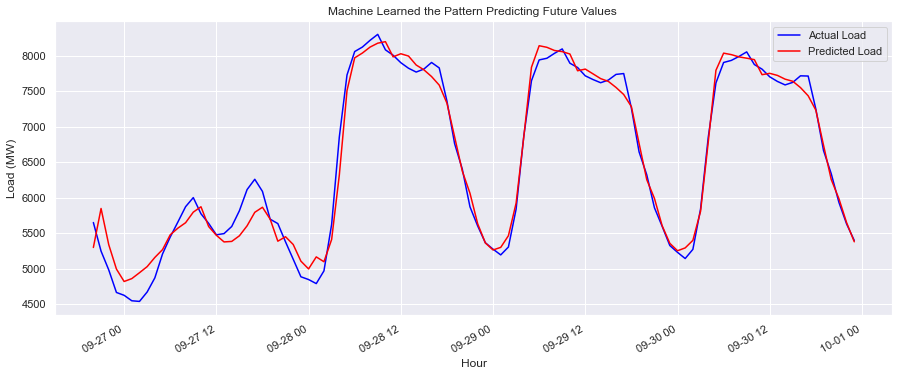

In [27]:
True_MegaWatt = TestData["AT_load_actual_entsoe_transparency"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()



fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="blue", label='Actual Load')
plt.plot(x,y1, color="red", label='Predicted Load')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Hour')
plt.ylabel("Load (MW)")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv("rawdatasimple1.csv")
data = data.dropna()
dates = pd.DataFrame(np.arange(len(data)))
adj_closes = data['AT_load_actual_entsoe_transparency']
X_train, X_test, y_train, y_test = train_test_split(dates, adj_closes, test_size = 0.1, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

# Build Linear Regression model
regr = LinearRegression()
regr.fit(X_train[:int(len(data)*0.9)], y_train[:int(len(data)*0.9)])

# Result (Accuracy score MSE and RMSE)
TM_MSE = np.mean((regr.predict(X_test) - y_test) ** 2)
TM_RMSE = sqrt(TM_MSE)

Training set has 45360 samples.
Testing set has 5040 samples.


In [29]:
TM_MSE

2013116.4089014474

In [30]:
TM_RMSE

1418.84333486874